# Gundabattula Madhuri
# Task 2 :- Titanic Classification
### Making a system which tells whether the person will be save from sinking.
# Bharat Intern 

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Get the Data
**Read in the train.csv file and set it to a data frame called df.**

In [3]:
df=pd.read_csv('train.csv')

**Check the head of df**

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


** Use info and describe() on df**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [39]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.361392
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [6]:
df.shape

(891, 12)

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df=df.drop('Cabin',axis=1)

In [12]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [16]:
df['Age'].value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
30.000000     25
19.000000     25
21.000000     24
25.000000     23
36.000000     22
29.000000     20
35.000000     18
26.000000     18
32.000000     18
27.000000     18
31.000000     17
16.000000     17
23.000000     15
34.000000     15
33.000000     15
20.000000     15
39.000000     14
40.000000     13
42.000000     13
17.000000     13
45.000000     12
38.000000     11
4.000000      10
50.000000     10
2.000000      10
            ... 
0.830000       2
30.500000      2
0.750000       2
57.000000      2
55.000000      2
70.000000      2
10.000000      2
32.500000      2
71.000000      2
63.000000      2
28.500000      2
45.500000      2
40.500000      2
59.000000      2
14.500000      1
0.670000       1
12.000000      1
0.920000       1
74.000000      1
34.500000      1
70.500000      1
36.500000      1
24.500000      1
66.000000      1
80.000000      1
55.500000      1
53.000000      1
20.500000     

## Exploratory Data Analysis

Let's use seaborn to explore the data!


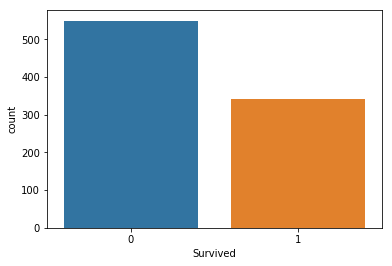

In [18]:
sns.countplot(x='Survived', data=df)

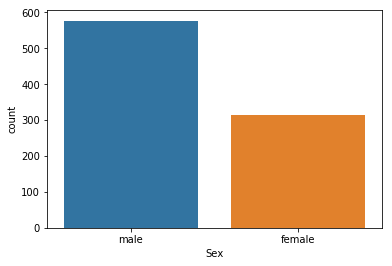

In [19]:
sns.countplot(x='Sex', data=df)

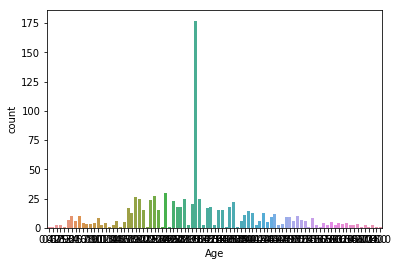

In [22]:
sns.countplot(x='Age', data=df)

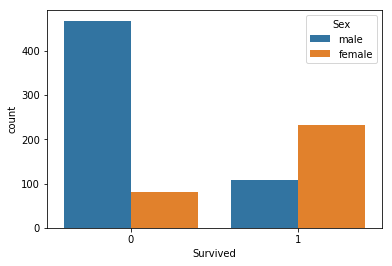

In [23]:
sns.countplot(x='Survived',hue='Sex', data=df)

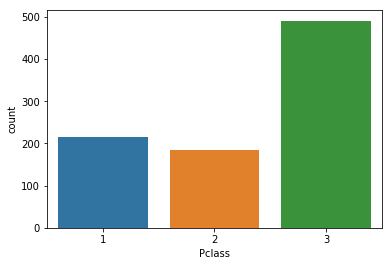

In [24]:
sns.countplot(x='Pclass', data=df)

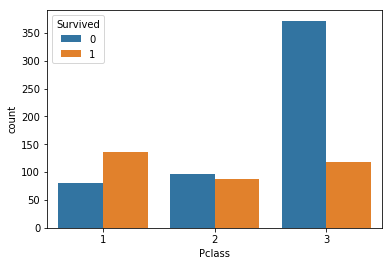

In [25]:
sns.countplot(x='Pclass', hue='Survived', data=df)

In [26]:
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**
1. Import necessary libraries for splitting
2. Define X and Y data from dataset
3. Use train_test_split() with X and Y

In [28]:
X = df.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = df['Survived']

** Train and fit a logistic regression model on the training set.**

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [31]:
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [32]:
predictions = logmodel.predict(X_test)

** Create a classification report and confusion matrix for the model.**

In [34]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, predictions))

[[91  9]
 [30 49]]


In [35]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,predictions))

             precision    recall  f1-score   support

          0       0.75      0.91      0.82       100
          1       0.84      0.62      0.72        79

avg / total       0.79      0.78      0.78       179



In [37]:
from sklearn.metrics import accuracy_score
test_data_accuracy = accuracy_score(Y_test, predictions)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7821229050279329
